# 시나리오
- 농어를 무게 단위로 판매하려 함
- 공급처로부터 농어를 받았는데 표시된 무게가 잘못된 경우가 발생
- 농어의 길이, 높이, 두께 정보가 존재
- 이 정보를 토대로 무게를 예측하고자 함
- 농어의 무게를 정확하게 측정한 샘플 필요

## 지도학습
### 분류
- 범주형(클래스) 데이터를 사용
- 클래스 중 하나의 결과

### 회귀
- 회귀는 수치형 데이터를 사용
- 수치 결과

### K-최근접 이웃 회귀 사용
- 예측하려는 샘플에 가장 가까운 샘플 K개를 선택
- 이 샘플들의 수치의 평균을 이용하여 값을 예측

#### 데이터 준비

In [12]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

#### 데이터 탐색

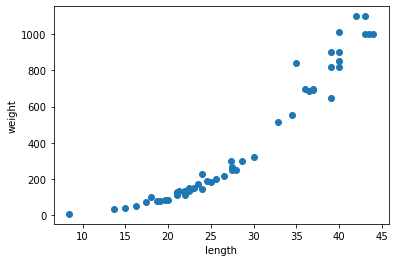

In [13]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##### 해석
- 농어의 길이가 길면 무게도 늘어남

#### 데이터 나누기

In [20]:
from sklearn.model_selection import train_test_split


# 데이터 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
    
print(train_input.shape, test_input.shape)

(42,) (14,)


In [15]:
# 사이킷런에 사용할 훈련 데이터셋은 2차원 배열이어야 함
# reshape예시
test_array = np.array([1,2,3,4])
print(test_array)
print(test_array.shape)
print(test_array.reshape(2, 2))
print(test_array.reshape(2, 2).shape)
print(test_array.reshape(4, 1))
print(test_array.reshape(4, 1).shape)

[1 2 3 4]
(4,)
[[1 2]
 [3 4]]
(2, 2)
[[1]
 [2]
 [3]
 [4]]
(4, 1)


In [21]:
# 훈련 데이터셋을 2차원으로 변경
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [22]:
test_input

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

#### 결정계수($R^2$)
- 회귀모델을 평가하는 기준

In [23]:
# KNeighborsRegressor 임포트
from sklearn.neighbors import KNeighborsRegressor

# KNeighborsRegressor 인스턴스 생성
knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input,train_target)

# 평가 점수 확인
knr.score(test_input, test_target)

0.992809406101064

##### 해석
- 분류에서 score는 샘플을 정확하게 분류한 개수의 비율(정확도)
- 회귀에서 score는 결정계수(coefficent of determination)
- 사이킷런에서 score는 정확도나 결정계수인 경우 높을수록 좋음
- 결정계수 계산방법
    - $ R^2 = 1-{(타겟-예측)^2의 합 \over (타겟-평균)^2 의 합 }$
    - 각 샘플의 타겟과 예측한 값의 차이를 제곱하여 더함(A)
    - 타깃과 타깃평균의 차이를 제곱하여 더한 값으로 A를 나눔
        
##### 의미해석 
- 만약 타깃이 평균 정도를 예측하는 수준이라면 
- 분자와 분모가 비슷해지면 $R^2$는 0에 가까워짐
- 예측이 타깃에 가까워지면(분자가 0에 가까워짐) 1에 가까운 값이 됨

In [26]:
# 평균 절대값 오차 확인
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대해 예측하기
test_pred = knr.predict(test_input)
print(test_pred)
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_pred)


[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]


In [27]:
test_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

##### 해석
- 평균적으로 19g정도 예측한 값이 타깃값과 다르다

#### 과대, 과소적합
- 훈련데이터셋으로 훈련했으므로 당연히 훈련데이터셋에 잘 맞는 모델이 생성됨


- 이 모델을 훈련셋과 테스트셋으로 각각 평가하면?
    - 일반적으로 훈련셋의 점수가 다소 높음


- 훈련셋의 점수가 좋은데 테스트셋에서 점수가 나쁘면 <b>과대적합</b>
    - 훈련셋에만 최적화된 모델이라는 의미


- 훈련셋보다 테스트셋의 점수가 높거나 두 점수가 모두 낮은 경우는 <b>과소적합</b>
    - 모델이 너무 단순하여 훈련셋이 적절하게 훈련되지 않음
    - 훈련데이터셋이 전체 데이터를 대표한다고 가정하므로 학습이 매우 중요함
    
#### 과소적합 이유
- 훈련 데이터셋과 테스트 데이터셋이 충분하지 않은 경우 발생

In [29]:
# 훈련 데이터로 예측하기 
print(knr.score(train_input, train_target))

0.9698823289099254


In [30]:
print('훈련데이터 점수:', knr.score(train_input, train_target))
print('테스트데이터 점수:', knr.score(test_input, test_target))

훈련데이터 점수: 0.9698823289099254
테스트데이터 점수: 0.992809406101064


- 훈련데이터셋의 점수가 테스트 세트의 점수보다 낮으므로 현재 <b>과소적합</b>
- 이 문제를 해결하려면?
    - 훈련 데이터셋에 더 잘 맞도록 모델을 더 복잡하게 만든다.
    - KNN은 n_neighbors 속성값을 조정(값을 줄임)


- 만약 <b>과대적합</b>인 경우 모델을 덜 복잡하게 만든다
    - KNN은 n_neighbors 속성값을 조정(값을 늘림)


In [31]:
# 이웃의 갯수를 3으로 설정
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print('훈련데이터 점수:', knr.score(train_input, train_target))
print('테스트데이터 점수:', knr.score(test_input, test_target))

훈련데이터 점수: 0.9804899950518966
테스트데이터 점수: 0.9746459963987609


##### 결과 해석
- 훈련데이터의 평가 점수가 테스트 데이터의 평가점수보다 높으므로 과소적합 해소
- 두 점수가 큰 차이가 나지 않으므로 과대적합도 아니라고 볼 수 있다.

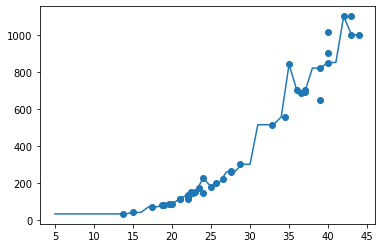

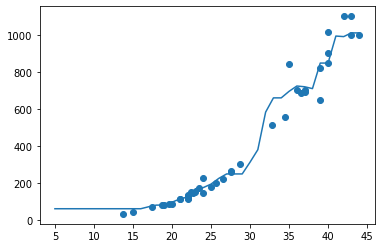

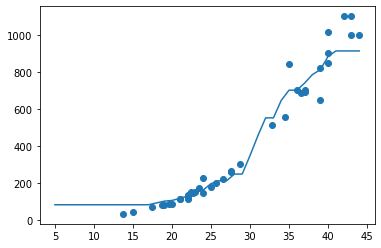

In [32]:
# 최근접 이웃 회귀의 n_neighbors값에 따라 모델의 단순화 확인

# k-최근접 이웃 회귀 객체 생성
knr = KNeighborsRegressor()

# 5에서 45까지 x 좌표 생성
x = np.arange(5,45).reshape(-1,1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 확인(반복문)
for n in [1,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input,train_target)
    pred = knr.predict(x)
    
    plt.scatter(train_input, train_target)
    plt.plot(x,pred)
    plt.show()